# Caltech Learning from Data HW1: Perceptron Algorithm

In this notebook, we study data that is linearly separable to determine the difference between the target function $f$ and the learned function $g$. Since the data is linearnly separable, the perceptron algorithm is guaranteed to converge and we use the perceptron algorithm to learn $g$. We first study how many iterations it takes for the perceptron algorithm to converge. Then, we use $g$ to make predictions on unseed data points (test data). We compare the predictions made by $g$ to the predictions made by $f$ to find the probability of misclassification between the learned $g$ and the target function $f$. 

## Libraries

In [1]:
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
%matplotlib inline

## Perceptron Functions

To determine the target function $f$, we pick two random points for $x_{1}$ in $[-1.0,1.0]$ and two random points for $x_{2}$ in $[-1.0,1.0]$. The decision boundary for $f$ is the line that goes through these two points. This function takes these two random points and calculates the weights for the decision boundary.

In [2]:
def weights_dec_bound( x_1_points, x_2_points ):
    
    # The decision boundary is given by w0 + w1*x1 + w2*x2 = 0
    # Dividing this equation by w0 and redefining this expression, we have
    # 1 + (w1/w0)x1 + (w2/w0) = 0 --> 1 + w1*x1 + w2*w2 = 0.
    # Thus, the decision boundary is give by x2 = -(w1/w2)x1 - (1/w2)
    # The two points are used to solve for w1 and w2
    
    w_1 = -( (x_2_points[1]-x_2_points[0])/(x_1_points[0]*x_2_points[1] - x_1_points[1]*x_2_points[0]) )
    w_2 =  ( (x_1_points[1]-x_1_points[0])/(x_1_points[0]*x_2_points[1] - x_1_points[1]*x_2_points[0]) )
    
    weights = np.array([w_1, w_2])
    
    return weights

This function takes as input the weights for a line and converts them into arrays $x_{1}$ ($x$-values) and 
 $x_{2}$ ($y$-values) for plotting.

In [3]:
def dec_bound_func( weights ):
    
    # The decision boundary is given by w0 + w1*x1 + w2*x2 = 0
    # Dividing this equation by w0 and redefining this expression, we have
    # 1 + (w1/w0)x1 + (w2/w0) = 0 --> 1 + w1*x1 + w2*w2 = 0.
    # Thus, the decision boundary is give by x2 = -(w1/w2)x1 - (1/w2)
    # The two points are used to solve for w1 and w2
    
    x_1_db = np.arange( -1.0, 1.0+0.01, 0.01)
    x_2_db = -(weights[0]/weights[1])*x_1_db - (1.0/weights[1])
    
    return x_1_db, x_2_db

This function takes as input the weights and the data points and returns the output labels for $y$.

In [4]:
def predicted_labels( weights, x_1_train_pts, x_2_train_pts ):
    
    X_train = np.column_stack( (x_1_train_pts, x_2_train_pts) )
    weights = weights.reshape( (len(weights), 1) )
    
    linear_output = ( 1 + np.dot( X_train, weights  ) ).flatten()
    
    #y_output = np.where( linear_output>= 0.0, 1, -1.0 )
    y_output = np.sign( linear_output )
    
    return y_output

This function takes as input the data and the output labels and uses the perceptron learning algorithm to learn the weights for a decision boundary which separates the $y=+1$ and the $y=-1$ data points. This function also returns the number of iterations it takes the perceptron learning algorithm to converge.

In [5]:
def percep_learn_alg( x_1_data, x_2_data, y_data_labels ):
    
    # Initializing the weights to 0
    weights = np.zeros(2, dtype = float)
    
    # Initialize the number of misclassified points to be all the points in the dataset
    N_missclass = len(y_data_labels)
    
    # Initialize the number of iterations to be 0
    N_iter = 0
    
    # Continue to perform the perceptron learning algorithm until there are no more misclassified points
    while( N_missclass != 0 ):
        
        # Use the current weights to predict the labels. Then, find the index of the missclasified points
        y_pred_labels = predicted_labels( weights, x_1_data, x_2_data )
        missclass_ind = np.where( y_pred_labels != y_data_labels )[0]
        N_missclass = len(missclass_ind)
        
        # If there are missclassified points, increment the iteration count and pick a random
        # data points from the misclasified points to update the weights
        if N_missclass != 0:
            N_iter += 1
            update_ind = np.random.choice(missclass_ind)
            weights += y_data_labels[update_ind]*np.array([x_1_data[update_ind], x_2_data[update_ind]])
    
    return weights, N_iter

## Running the Perceptron Learning Algorithm for $N = 10$ and $N=100$ Training Examples

For $N=10$, we can see that the decision boundary learned by the perceptron algorithm correctly classifies all the points in the training set. However, we can see that there is a difference between the target function decision boundary and the decision boundary learned by $g$. Thus, we do expect for $g$ to misclassify some points.

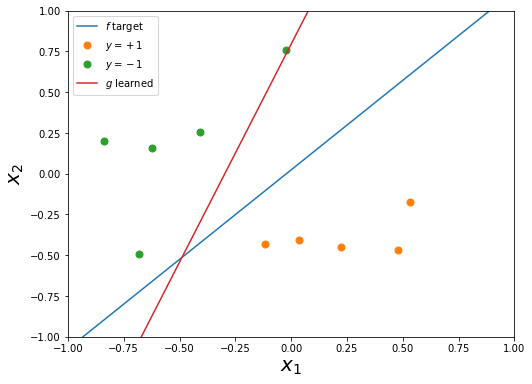

In [6]:
plt.figure(figsize=(8,6))

x_1_f_target_pts, x_2_f_target_pts = np.random.uniform( -1.0, 1.0, size = 2 ), np.random.uniform( -1.0, 1.0, size = 2)
weights_db_f_target = weights_dec_bound( x_1_f_target_pts, x_2_f_target_pts )
x_1_db_f_target, x_2_db_f_target = dec_bound_func( weights_db_f_target )
plt.plot( x_1_db_f_target, x_2_db_f_target, label = r"$f$" + " target" )

N_train = 10
x_1_train_pts, x_2_train_pts = np.random.uniform( -1.0, 1.0, N_train ), np.random.uniform( -1.0, 1.0, N_train )
y_train_labels = predicted_labels( weights_db_f_target, x_1_train_pts, x_2_train_pts )

plt.plot(x_1_train_pts[y_train_labels==+1.0],x_2_train_pts[y_train_labels==+1.0],'.',markersize = 14, label=r"$y=+1$") 
plt.plot(x_1_train_pts[y_train_labels==-1.0],x_2_train_pts[y_train_labels==-1.0],'.',markersize = 14, label=r"$y=-1$")

weights_db_g_learn = percep_learn_alg( x_1_train_pts, x_2_train_pts, y_train_labels )[0]
x_1_db_g_learn, x_2_db_g_learn = dec_bound_func( weights_db_g_learn )
plt.plot( x_1_db_g_learn, x_2_db_g_learn, label = r"$g$" + " learned" )


plt.xlim((-1.0,1.0))
plt.ylim((-1.0,1.0))
plt.legend(loc="best")
plt.xlabel(r"$x_{1}$", fontsize = 20)
plt.ylabel(r"$x_{2}$", fontsize = 20)

Some plot as above for $N =100$. We can see that with more data, the function learning by the perceptron algorithm $g$ is closet to the target function $f$.

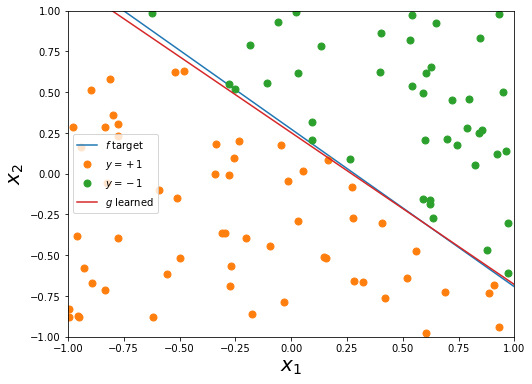

In [7]:
plt.figure(figsize=(8,6))

x_1_f_target_pts, x_2_f_target_pts = np.random.uniform( -1.0, 1.0, size = 2 ), np.random.uniform( -1.0, 1.0, size = 2)
weights_db_f_target = weights_dec_bound( x_1_f_target_pts, x_2_f_target_pts )
x_1_db_f_target, x_2_db_f_target = dec_bound_func( weights_db_f_target )
plt.plot( x_1_db_f_target, x_2_db_f_target, label = r"$f$" + " target" )

N_train = 100
x_1_train_pts, x_2_train_pts = np.random.uniform( -1.0, 1.0, N_train ), np.random.uniform( -1.0, 1.0, N_train )
y_train_labels = predicted_labels( weights_db_f_target, x_1_train_pts, x_2_train_pts )

plt.plot(x_1_train_pts[y_train_labels==+1.0],x_2_train_pts[y_train_labels==+1.0],'.',markersize = 14, label=r"$y=+1$") 
plt.plot(x_1_train_pts[y_train_labels==-1.0],x_2_train_pts[y_train_labels==-1.0],'.',markersize = 14, label=r"$y=-1$")

weights_db_g_learn = percep_learn_alg( x_1_train_pts, x_2_train_pts, y_train_labels )[0]
x_1_db_g_learn, x_2_db_g_learn = dec_bound_func( weights_db_g_learn )
plt.plot( x_1_db_g_learn, x_2_db_g_learn, label = r"$g$" + " learned" )

plt.xlim((-1.0,1.0))
plt.ylim((-1.0,1.0))
plt.legend(loc="best")
plt.xlabel(r"$x_{1}$", fontsize = 20)
plt.ylabel(r"$x_{2}$", fontsize = 20)

## Determining the number of iterations it takes the Perceptron Learning Algorithm to converge for  $N=10$  and  $N=100$ Training Examples

Average # Iteration for Percep Learn Alg Convergence: 11.04
Median # Iteration for Percep Learn Alg Convergence: 4.00
Stand Dev # Iteration for Percep Learn Alg Convergence: 75.53


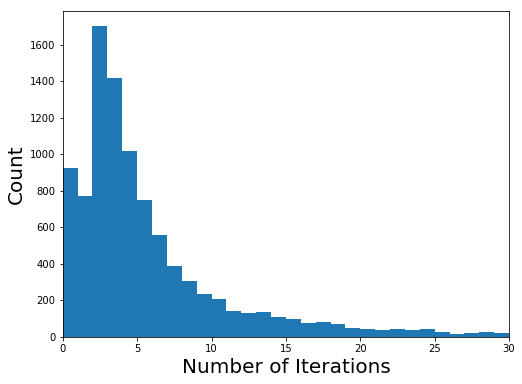

In [8]:
N_sims = 10000
N_train = 10
N_iter_each_sim = np.zeros(N_sims)

for i in range(N_sims):

    x_1_f_target_pts, x_2_f_target_pts = np.random.uniform( -1.0, 1.0, size = 2 ), np.random.uniform( -1.0, 1.0, size = 2)
    weights_db_f_target = weights_dec_bound( x_1_f_target_pts, x_2_f_target_pts )

    x_1_train_pts, x_2_train_pts = np.random.uniform( -1.0, 1.0, N_train ), np.random.uniform( -1.0, 1.0, N_train )
    y_train_labels = predicted_labels( weights_db_f_target, x_1_train_pts, x_2_train_pts )

    N_iter_each_sim[i] = percep_learn_alg( x_1_train_pts, x_2_train_pts, y_train_labels )[1]
    
    
print("Average # Iteration for Percep Learn Alg Convergence: %.2f" %(np.mean(N_iter_each_sim)) )
print("Median # Iteration for Percep Learn Alg Convergence: %.2f" %(np.median(N_iter_each_sim)) )
print("Stand Dev # Iteration for Percep Learn Alg Convergence: %.2f" %(np.std(N_iter_each_sim)) )

plt.figure(figsize=(8,6))
plt.hist(N_iter_each_sim, bins = np.arange(0,100+1,1))
plt.xlim((0,30))
plt.xlabel("Number of Iterations", fontsize = 20)
plt.ylabel("Count", fontsize = 20)


Average # Iteration for Percep Learn Alg Convergence: 234.09
Median # Iteration for Percep Learn Alg Convergence: 37.00
Stand Dev # Iteration for Percep Learn Alg Convergence: 1539.08


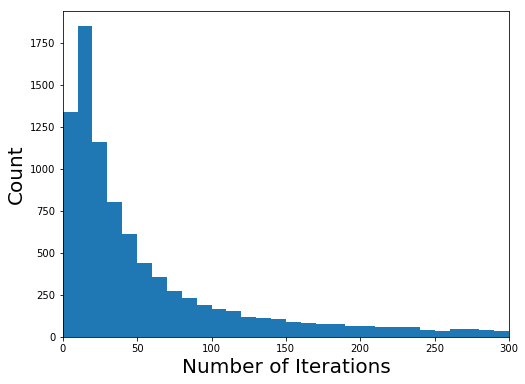

In [9]:
N_sims = 10000
N_train = 100
N_iter_each_sim = np.zeros(N_sims)

for i in range(N_sims):

    x_1_f_target_pts, x_2_f_target_pts = np.random.uniform( -1.0, 1.0, size = 2 ), np.random.uniform( -1.0, 1.0, size = 2)
    weights_db_f_target = weights_dec_bound( x_1_f_target_pts, x_2_f_target_pts )

    x_1_train_pts, x_2_train_pts = np.random.uniform( -1.0, 1.0, N_train ), np.random.uniform( -1.0, 1.0, N_train )
    y_train_labels = predicted_labels( weights_db_f_target, x_1_train_pts, x_2_train_pts )

    N_iter_each_sim[i] = percep_learn_alg( x_1_train_pts, x_2_train_pts, y_train_labels )[1]
    
    
print("Average # Iteration for Percep Learn Alg Convergence: %.2f" %(np.mean(N_iter_each_sim)) )
print("Median # Iteration for Percep Learn Alg Convergence: %.2f" %(np.median(N_iter_each_sim)) )
print("Stand Dev # Iteration for Percep Learn Alg Convergence: %.2f" %(np.std(N_iter_each_sim)) )

plt.figure(figsize=(8,6))
plt.hist(N_iter_each_sim, bins = np.arange(0,1000+10,10))
plt.xlim((0,300))
plt.xlabel("Number of Iterations", fontsize = 20)
plt.ylabel("Count", fontsize = 20)


## Fraction of Data Points Missclasified by $g$ learned by the Perceptron Learning Algorothm

Printing Fraction of Misclasified Points by $g$ and plotting the points misclassified by $g$. Here, the weights for $g$ were learned by $N = 10$ training examples.

Average Error Between g_learn label pred and f labels: 0.11
Median Error Between g_learn label pred and f labels: 0.10
Std Dev Error Between g_learn label pred and f labels: 0.07


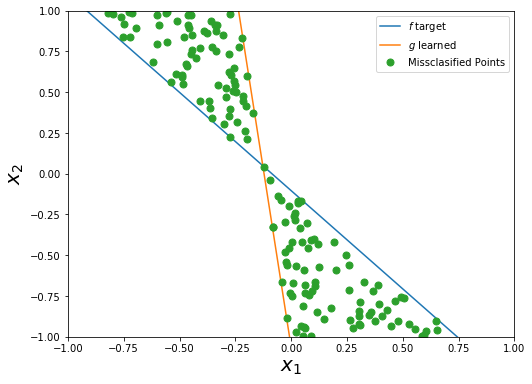

In [10]:
N_sims = 1000
N_train = 10
N_test_pts = 1000
fract_wrong_pred = np.zeros(N_sims)

for i in range(N_sims):

    x_1_f_target_pts, x_2_f_target_pts = np.random.uniform( -1.0, 1.0, size = 2 ), np.random.uniform( -1.0, 1.0, size = 2)
    weights_db_f_target = weights_dec_bound( x_1_f_target_pts, x_2_f_target_pts )

    x_1_train_pts, x_2_train_pts = np.random.uniform( -1.0, 1.0, N_train ), np.random.uniform( -1.0, 1.0, N_train )
    y_train_labels = predicted_labels( weights_db_f_target, x_1_train_pts, x_2_train_pts )

    weights_db_g_learn = percep_learn_alg( x_1_train_pts, x_2_train_pts, y_train_labels )[0]
    
    x_1_test_pts, x_2_test_pts = np.random.uniform( -1.0, 1.0, N_test_pts ), np.random.uniform( -1.0, 1.0, N_test_pts )
    y_f_labels = predicted_labels( weights_db_f_target, x_1_test_pts, x_2_test_pts )
    y_g_pred_labels = predicted_labels( weights_db_g_learn, x_1_test_pts, x_2_test_pts )
    
    fract_wrong_pred[i] = np.sum( y_g_pred_labels != y_f_labels )/N_test_pts

print("Average Error Between g_learn label pred and f labels: %.2f" %(np.mean(fract_wrong_pred)) )
print("Median Error Between g_learn label pred and f labels: %.2f" %(np.median(fract_wrong_pred)) )
print("Std Dev Error Between g_learn label pred and f labels: %.2f" %(np.std(fract_wrong_pred)) )

plt.figure(figsize=(8,6))

x_1_db_f_target, x_2_db_f_target = dec_bound_func( weights_db_f_target )
plt.plot( x_1_db_f_target, x_2_db_f_target, label = r"$f$" + " target" )

x_1_db_g_learn, x_2_db_g_learn = dec_bound_func( weights_db_g_learn )
plt.plot( x_1_db_g_learn, x_2_db_g_learn, label = r"$g$" + " learned" )

missclass_ind = np.where( y_g_pred_labels != y_f_labels )

plt.plot(x_1_test_pts[missclass_ind],x_2_test_pts[missclass_ind],'.',markersize = 14, label = "Missclasified Points") 


plt.xlim((-1.0,1.0))
plt.ylim((-1.0,1.0))
plt.legend(loc="best")
plt.xlabel(r"$x_{1}$", fontsize = 20)
plt.ylabel(r"$x_{2}$", fontsize = 20)


Printing Fraction of Misclasified Points by $g$ and plotting the points misclassified by $g$. Here, the weights for $g$ were learned by $N = 100$ training examples.

Average Error Between g_learn label pred and f labels: 0.01
Median Error Between g_learn label pred and f labels: 0.01
Std Dev Error Between g_learn label pred and f labels: 0.01


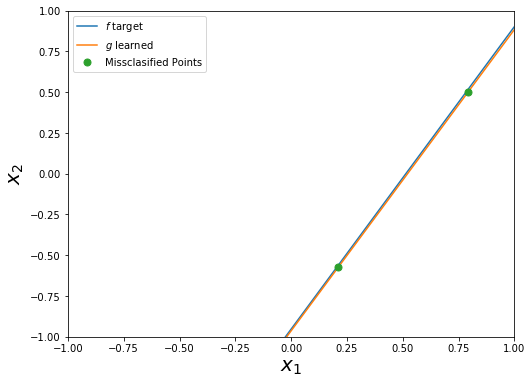

In [11]:
N_sims = 1000
N_train = 100
N_test_pts = 1000
fract_wrong_pred = np.zeros(N_sims)

for i in range(N_sims):

    x_1_f_target_pts, x_2_f_target_pts = np.random.uniform( -1.0, 1.0, size = 2 ), np.random.uniform( -1.0, 1.0, size = 2)
    weights_db_f_target = weights_dec_bound( x_1_f_target_pts, x_2_f_target_pts )

    x_1_train_pts, x_2_train_pts = np.random.uniform( -1.0, 1.0, N_train ), np.random.uniform( -1.0, 1.0, N_train )
    y_train_labels = predicted_labels( weights_db_f_target, x_1_train_pts, x_2_train_pts )

    weights_db_g_learn = percep_learn_alg( x_1_train_pts, x_2_train_pts, y_train_labels )[0]
    
    x_1_test_pts, x_2_test_pts = np.random.uniform( -1.0, 1.0, N_test_pts ), np.random.uniform( -1.0, 1.0, N_test_pts )
    y_f_labels = predicted_labels( weights_db_f_target, x_1_test_pts, x_2_test_pts )
    y_g_pred_labels = predicted_labels( weights_db_g_learn, x_1_test_pts, x_2_test_pts )
    
    fract_wrong_pred[i] = np.sum( y_g_pred_labels != y_f_labels )/N_test_pts

print("Average Error Between g_learn label pred and f labels: %.2f" %(np.mean(fract_wrong_pred)) )
print("Median Error Between g_learn label pred and f labels: %.2f" %(np.median(fract_wrong_pred)) )
print("Std Dev Error Between g_learn label pred and f labels: %.2f" %(np.std(fract_wrong_pred)) )


plt.figure(figsize=(8,6))

x_1_db_f_target, x_2_db_f_target = dec_bound_func( weights_db_f_target )
plt.plot( x_1_db_f_target, x_2_db_f_target, label = r"$f$" + " target" )

x_1_db_g_learn, x_2_db_g_learn = dec_bound_func( weights_db_g_learn )
plt.plot( x_1_db_g_learn, x_2_db_g_learn, label = r"$g$" + " learned" )

missclass_ind = np.where( y_g_pred_labels != y_f_labels )

plt.plot(x_1_test_pts[missclass_ind],x_2_test_pts[missclass_ind],'.',markersize = 14, label = "Missclasified Points") 


plt.xlim((-1.0,1.0))
plt.ylim((-1.0,1.0))
plt.legend(loc="best")
plt.xlabel(r"$x_{1}$", fontsize = 20)
plt.ylabel(r"$x_{2}$", fontsize = 20)